In [ ]:
#color2gray
src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY) 

#smoothing filter
dst_avg = cv2.blur( src,(ksize,ksize) )     # Average (Box) smoothing filter (normalized)
dst_gauss = cv2.GaussianBlur( src,(ksize,ksize),0 ) # Weighted average (Gaussian) smoothing filter
dst_med = cv2.medianBlur( src, ksize )   # size of square kernel (positive & odd value)
dst_bilat = cv2.bilateralFilter( src,ksize,75, 75 )   # two sigma values (big = strong effect)

#grey threshoding
cv2.createTrackbar("greyth:thres", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:thres", win_name, 128)
cv2.createTrackbar("greyth:maxval", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:maxval", win_name, 200)
#grey_thresholding
thres = cv2.getTrackbarPos("greyth:thres", win_name)
maxval = cv2.getTrackbarPos("greyth:maxval", win_name)
ret1,src_greyth = cv2.threshold(src_grey,thres,maxval,cv2.THRESH_BINARY) 
src_greyth = ~src_greyth
# ret1,thresh1 = cv2.threshold(img,thres,maxval,cv2.THRESH_BINARY)
# ret2,thresh2 = cv2.threshold(img,thres,maxval,cv2.THRESH_BINARY_INV)
# ret3,thresh3 = cv2.threshold(img,thres,maxval,cv2.THRESH_TRUNC)
# ret4,thresh4 = cv2.threshold(img,thres,maxval,cv2.THRESH_TOZERO)
# ret5,thresh5 = cv2.threshold(img,thres,maxval,cv2.THRESH_TOZERO_INV)

#Otsu thresholding (white = object, black = else)
ret,src_greyth = cv2.threshold( src_grey,0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU )

#adaptiveThreshold ใช้ในกรณีภาพมีเงา
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,ksize,2 )
thresh3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,ksize,2 )

#HSV
cv2.createTrackbar("HSV:HUE-low", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:HUE-high", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:SAT-min%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("HSV:HUE-low", win_name, 0)
cv2.setTrackbarPos("HSV:HUE-high", win_name, 0)
cv2.setTrackbarPos("HSV:SAT-min%", win_name, 0)
#HSV
src_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
src_h = src_hsv[:,:,0]
src_s = src_hsv[:,:,1]
src_v = src_hsv[:,:,2]
th1 = cv2.getTrackbarPos("HSV:HUE-low", win_name)
th2 = cv2.getTrackbarPos("HSV:HUE-high", win_name)
min_sat = cv2.getTrackbarPos("HSV:SAT-min%", win_name) / 100.0
mask_h = cv2.inRange( src_h, th1, th2 )
ret,mask_s = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
mask_hs = cv2.bitwise_and( mask_h, mask_s )
src_segHSV = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_hs, cv2.COLOR_GRAY2BGR ) )

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)


#LAB
cv2.createTrackbar("Lab:b-low", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:b-high", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:l%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("Lab:b-low", win_name, 175)
cv2.setTrackbarPos("Lab:b-high", win_name, 197)
cv2.setTrackbarPos("Lab:l%", win_name, 1)
#LAB
src_Lab = cv2.cvtColor( src_color, cv2.COLOR_BGR2Lab )
src_l = src_Lab[:,:,0]
src_a = src_Lab[:,:,1]
src_b = src_Lab[:,:,2]
th1 = cv2.getTrackbarPos("Lab:b-low", win_name)
th2 = cv2.getTrackbarPos("Lab:b-high", win_name)
min_sat = cv2.getTrackbarPos("Lab:l%", win_name) / 100.0
mask_b = cv2.inRange( src_b, th1, th2 )
ret,mask_l = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
mask_bl = cv2.bitwise_and( mask_b, mask_l )
src_segLab = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_bl, cv2.COLOR_GRAY2BGR ) )

#canny
cv2.createTrackbar("canny:thresh1", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("canny:thresh1", win_name, 11)
cv2.createTrackbar("canny:thresh2", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("canny:thresh2", win_name, 83)
#canny
thresh1 = cv2.getTrackbarPos("canny:thresh1", win_name)
thresh2 = cv2.getTrackbarPos("canny:thresh2", win_name)
canny = cv2.Canny ( src_grey, thresh1, thresh2 )

#convert to binary img
#src_Grey = cv2.cvtColor( src_greyth, cv2.COLOR_BGR2GRAY )
src_Grey = src_greyth
seg_greyth = np.zeros_like ( src_Grey )
seg_greyth [ src_Grey > seg_greyth ] = 255
#seg_greyth = ~seg_greyth

#erode&dilate
#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 3)
#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 5)
#erode&dilate--------
ksize = 5
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
#erode
itr2 = cv2.getTrackbarPos("erode:itr", win_name)
src_erode = cv2.erode ( seg_greyth, kernel, iterations=itr2 )
#dilate
itr = cv2.getTrackbarPos("dilate:itr", win_name)
src_dilate = cv2.dilate ( src_erode, kernel, iterations=itr )

#dist_transform
dist_transform = cv2.distanceTransform( src_dilate, cv2.DIST_L2, 5 )
dist_transform = cv2.normalize(dist_transform, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)

#sure fg
cv2.createTrackbar("surefg:percen", win_name, 1, 100, (lambda a: None))
cv2.setTrackbarPos("surefg:percen", win_name, 5)
#sure fg
per_surefg = cv2.getTrackbarPos("surefg:percen", win_name)
sure_fg = np.zeros_like( dist_transform )
sure_fg [ dist_transform > ((per_surefg/100) * dist_transform.max()) ] = 255


#----------------------------------------------------------------------------------------------------
#contour
contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )


#draw countour
src_contours_circle = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
src_contours_area = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=-1 )

# Find For the biggest contour, 
biggest_contour = max ( contours_canny, key=cv2.contourArea )
# draw a red circle at its centroid
M = cv2.moments( biggest_contour )
cen_x , cen_y = int ( M['m10']/M['m00'] ) , int ( M['m01']/M['m00'] )
cv2.circle( ctimg_canny, (cen_x,cen_y), 6, (0,0,255), thickness=-1 ) 

#draw countour find max
max_len = 0
for c in contours:
    if len(c) > max_len:
        src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
        src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
        max_len = len(c)

#approx countour
cv2.createTrackbar("approx:percen", win_name, 1, 100, (lambda a: None))
cv2.setTrackbarPos("approx:percen", win_name, 5)
#approx countour
percen = cv2.getTrackbarPos("approx:percen", win_name)
src_approx = np.zeros_like ( src_color )
contours_approx = []
for c in contours:
    eps = (percen/100)*cv2.arcLength(c,True)
    c_approx = cv2.approxPolyDP ( c, eps, True )
    cv2.drawContours( src_approx, [c_approx], 0, (0,255,0), -1 )  
    contours_approx.append( c_approx )

#mask
condition = (src_contours_area[...,1]==255) & (src_contours_area[...,0]==0) & (src_contours_area[...,2]==0)
final = np.zeros_like(src_color)
final[condition] = src_color[condition]

#--------------------------------------------------------------------------------------
#plot
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( dist_transform, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( sure_fg, cv2.COLOR_GRAY2RGB )
        
        
    
            #HSV
            cv2.cvtColor( src_h, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_s, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_v, cv2.COLOR_GRAY2RGB ),
            cv2.applyColorMap(src_h, 2),
            cv2.cvtColor( src_segHSV, cv2.COLOR_BGR2RGB ),
            #Lab
            cv2.cvtColor( src_b, cv2.COLOR_GRAY2RGB ),
            cv2.applyColorMap(src_b, 4),
            cv2.cvtColor( src_segLab, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            #dilate
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            #erode
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            #contour
            cv2.cvtColor( src_contours_circle, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_contours_area, cv2.COLOR_BGR2RGB ),
            #final
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            
            COLORMAP_AUTUMN = 0
            COLORMAP_BONE = 1
            COLORMAP_COOL = 8
            COLORMAP_HOT = 11
            COLORMAP_HSV = 9
            COLORMAP_JET = 2
            COLORMAP_OCEAN = 5
            COLORMAP_PINK = 10
            COLORMAP_RAINBOW = 4
            COLORMAP_SPRING = 7
            COLORMAP_SUMMER = 6
            COLORMAP_WINTER = 3
#           cv2.applyColorMap(imgColor, 3)

















# Start Form

In [ ]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


vdo = cv2.VideoCapture('ball_tracking_example.mp4')  #for vdo-------------
# src_color = cv2.imread('capture.jpg')  #for img-------------
    
win_name = 'football'
cv2.namedWindow(win_name)

# #HSV
# cv2.createTrackbar("HSV:HUE-low", win_name, 0, 179, (lambda a: None) )
# cv2.createTrackbar("HSV:HUE-high", win_name, 0, 179, (lambda a: None) )
# cv2.createTrackbar("HSV:SAT-min%", win_name, 0, 100, (lambda a: None) )
# cv2.setTrackbarPos("HSV:HUE-low", win_name, 0)
# cv2.setTrackbarPos("HSV:HUE-high", win_name, 0)
# cv2.setTrackbarPos("HSV:SAT-min%", win_name, 0)

# #LAB
# cv2.createTrackbar("Lab:b-low", win_name, 0, 255, (lambda a: None) )
# cv2.createTrackbar("Lab:b-high", win_name, 0, 255, (lambda a: None) )
# cv2.createTrackbar("Lab:l%", win_name, 0, 100, (lambda a: None) )
# cv2.setTrackbarPos("Lab:b-low", win_name, 149)
# cv2.setTrackbarPos("Lab:b-high", win_name, 181)
# cv2.setTrackbarPos("Lab:l%", win_name, 30)

# #dilate
# cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
# cv2.setTrackbarPos("dilate:itr", win_name, 8)

# #erode
# cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
# cv2.setTrackbarPos("erode:itr", win_name, 5)




while True:
    retval,src_color = vdo.read()  #for vdo-------------
    if not retval:    #for vdo-------------
        break       #for vdo-------------
    
#     #HSV
#     src_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
#     src_h = src_hsv[:,:,0]
#     src_s = src_hsv[:,:,1]
#     src_v = src_hsv[:,:,2]
#     th1 = cv2.getTrackbarPos("HSV:HUE-low", win_name)
#     th2 = cv2.getTrackbarPos("HSV:HUE-high", win_name)
#     min_sat = cv2.getTrackbarPos("HSV:SAT-min%", win_name) / 100.0
#     mask_h = cv2.inRange( src_h, th1, th2 )
#     ret,mask_s = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
#     mask_hs = cv2.bitwise_and( mask_h, mask_s )
#     src_segHSV = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_hs, cv2.COLOR_GRAY2BGR ) )

#     #LAB
#     src_Lab = cv2.cvtColor( src_color, cv2.COLOR_BGR2Lab )
#     src_l = src_Lab[:,:,0]
#     src_a = src_Lab[:,:,1]
#     src_b = src_Lab[:,:,2]
#     th1 = cv2.getTrackbarPos("Lab:b-low", win_name)
#     th2 = cv2.getTrackbarPos("Lab:b-high", win_name)
#     min_sat = cv2.getTrackbarPos("Lab:l%", win_name) / 100.0
#     mask_b = cv2.inRange( src_b, th1, th2 )
#     ret,mask_l = cv2.threshold( src_l,min_sat*255, 255,cv2.THRESH_BINARY )
#     mask_bl = cv2.bitwise_and( mask_b, mask_l )
#     src_segLab = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_bl, cv2.COLOR_GRAY2BGR ) )

#     #convert to binary img
#     src_Grey = cv2.cvtColor( src_segLab, cv2.COLOR_BGR2GRAY )
#     seg_greyth = np.zeros_like ( src_Grey )
#     seg_greyth [ src_Grey > seg_greyth ] = 255
# #     seg_greyth = ~seg_greyth

#     #dilate
#     ksize = 5
#     itr = cv2.getTrackbarPos("dilate:itr", win_name)
#     kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
#     src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
#     #erode
#     itr2 = cv2.getTrackbarPos("erode:itr", win_name)
#     src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
#     #contour
#     contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    

#     #draw countour
#     src_contours_circle = src_color.copy()
#     src_contours_area = src_color.copy()
#     if len(contours) > 0:
#         c = max(contours, key=cv2.contourArea)
#         ((x, y), radius) = cv2.minEnclosingCircle(c)

#         if radius > 10:
#             cv2.circle(src_contours_area, (int(x), int(y)), int(radius), (0, 255, 0), -1)
#             cv2.circle(src_contours_circle, (int(x), int(y)), int(radius), (0, 255, 0), 2)
            

# #     #draw countour
# #     src_contours_circle = cv2.drawContours ( src_color.copy(), [biggest_contour], -1, (0,255,0), thickness=2 )
# #     src_contours_area = cv2.drawContours ( src_color.copy(), [biggest_contour], -1, (0,255,0), thickness=-1 )
    
#     #mask
#     condition = (src_contours_area[...,1]==255) & (src_contours_area[...,0]==0) & (src_contours_area[...,2]==0)
#     final = np.zeros_like(src_color)
#     final[condition] = src_color[condition]
    
    
            
    
#     max_len = 0
#     for c in contours:
#         if len(c) > max_len:
#             src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
#             src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
#             max_len = len(c)
    
    
    pig = [ 
#             cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            src_color,
# #             #HSV
# #             cv2.cvtColor( src_h, cv2.COLOR_GRAY2RGB ),
# #             cv2.cvtColor( src_s, cv2.COLOR_GRAY2RGB ),
# #             cv2.cvtColor( src_v, cv2.COLOR_GRAY2RGB ),
# #             cv2.applyColorMap(src_h, 2),
# #             cv2.cvtColor( src_segHSV, cv2.COLOR_BGR2RGB ),
#             #Lab
#             cv2.cvtColor( src_b, cv2.COLOR_GRAY2RGB ),
#             cv2.applyColorMap(src_b, 4),
#             cv2.cvtColor( src_segLab, cv2.COLOR_BGR2RGB ),
        
#             cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
        
#             #dilate
#             cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
#             #erode
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2BGR ),
        
#             #contour
            src_contours_circle,
#             cv2.cvtColor( src_contours_circle, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( src_contours_area, cv2.COLOR_BGR2RGB ),
        
            
            
        
            #final
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            
            # COLORMAP_AUTUMN = 0
            # COLORMAP_BONE = 1
            # COLORMAP_COOL = 8
            # COLORMAP_HOT = 11
            # COLORMAP_HSV = 9
            # COLORMAP_JET = 2
            # COLORMAP_OCEAN = 5
            # COLORMAP_PINK = 10
            # COLORMAP_RAINBOW = 4
            # COLORMAP_SPRING = 7
            # COLORMAP_SUMMER = 6
            # COLORMAP_WINTER = 3
#           cv2.applyColorMap(imgColor, 3)
        

            
          ]

#     #For test---slow
#     for i in range(15):
#         if i < len(pig):
#             pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
#         else:
#             pig.append(np.zeros_like(pig[0]))
#     frame_h = (np.hstack((pig[0],pig[1],pig[2])),
#              np.hstack((pig[3],pig[4],pig[5])),
#              np.hstack((pig[6],pig[7],pig[8])),
#              np.hstack((pig[9],pig[10],pig[11])),
#              np.hstack((pig[12],pig[13],pig[14])),
               
#             )    

    #ok
    frame_h = (np.hstack((pig[0],pig[1])),
             np.hstack((pig[2],pig[3])),
            )   
     
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.2, fy=0.2)
    cv2.imshow(win_name+'2', frame)


    

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

# coin

In [9]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture(0)  #for vdo-------------
src_color = cv2.imread('coin1.jpg')  #for img-------------
    
win_name = 'coin'
cv2.namedWindow(win_name)

#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 3)

#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 5)

#sure fg
cv2.createTrackbar("surefg:percen", win_name, 1, 100, (lambda a: None))
cv2.setTrackbarPos("surefg:percen", win_name, 5)


# #grey threshoding
# cv2.createTrackbar("greyth:thres", win_name, 0, 255, (lambda a: None) )
# cv2.setTrackbarPos("greyth:thres", win_name, 128)
# cv2.createTrackbar("greyth:maxval", win_name, 0, 255, (lambda a: None) )
# cv2.setTrackbarPos("greyth:maxval", win_name, 200)

# #HSV
# cv2.createTrackbar("HSV:HUE-low", win_name, 0, 179, (lambda a: None) )
# cv2.createTrackbar("HSV:HUE-high", win_name, 0, 179, (lambda a: None) )
# cv2.createTrackbar("HSV:SAT-min%", win_name, 0, 100, (lambda a: None) )
# cv2.setTrackbarPos("HSV:HUE-low", win_name, 0)
# cv2.setTrackbarPos("HSV:HUE-high", win_name, 0)
# cv2.setTrackbarPos("HSV:SAT-min%", win_name, 0)

# #LAB
# cv2.createTrackbar("Lab:b-low", win_name, 0, 255, (lambda a: None) )
# cv2.createTrackbar("Lab:b-high", win_name, 0, 255, (lambda a: None) )
# cv2.createTrackbar("Lab:l%", win_name, 0, 100, (lambda a: None) )
# cv2.setTrackbarPos("Lab:b-low", win_name, 175)
# cv2.setTrackbarPos("Lab:b-high", win_name, 197)
# cv2.setTrackbarPos("Lab:l%", win_name, 1)

# #dilate
# cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
# cv2.setTrackbarPos("dilate:itr", win_name, 5)

# #erode
# cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
# cv2.setTrackbarPos("erode:itr", win_name, 3)




while True:
#     retval,src_color = vdo.read()  #for vdo-------------

    src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY) 

    #Otsu thresholding (white = object, black = else)
    ret,src_greyth = cv2.threshold( src_grey,0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU )
    
    #convert to binary img
    #src_Grey = cv2.cvtColor( src_greyth, cv2.COLOR_BGR2GRAY )
    src_Grey = src_greyth
    seg_greyth = np.zeros_like ( src_Grey )
    seg_greyth [ src_Grey > seg_greyth ] = 255
    #seg_greyth = ~seg_greyth
    
    #erode&dilate
    ksize = 5
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( seg_greyth, kernel, iterations=itr2 )
    #dilate
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    src_dilate = cv2.dilate ( src_erode, kernel, iterations=itr )
    
    #dist_transform
    dist_transform = cv2.distanceTransform( src_dilate, cv2.DIST_L2, 5 )
    dist_transform = cv2.normalize(dist_transform, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)

    #sure fg
    per_surefg = cv2.getTrackbarPos("surefg:percen", win_name)
    sure_fg = np.zeros_like( dist_transform )
    sure_fg [ dist_transform > ((per_surefg/100) * dist_transform.max()) ] = 255



#     #grey_thresholding
#     thres = cv2.getTrackbarPos("greyth:thres", win_name)
#     maxval = cv2.getTrackbarPos("greyth:maxval", win_name)
#     ret1,src_greyth = cv2.threshold(src_grey,thres,maxval,cv2.THRESH_BINARY)
#     src_greyth = ~src_greyth
    
#     #HSV
#     src_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
#     src_h = src_hsv[:,:,0]
#     src_s = src_hsv[:,:,1]
#     src_v = src_hsv[:,:,2]
#     th1 = cv2.getTrackbarPos("HSV:HUE-low", win_name)
#     th2 = cv2.getTrackbarPos("HSV:HUE-high", win_name)
#     min_sat = cv2.getTrackbarPos("HSV:SAT-min%", win_name) / 100.0
#     mask_h = cv2.inRange( src_h, th1, th2 )
#     ret,mask_s = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
#     mask_hs = cv2.bitwise_and( mask_h, mask_s )
#     src_segHSV = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_hs, cv2.COLOR_GRAY2BGR ) )

#     #LAB
#     src_Lab = cv2.cvtColor( src_color, cv2.COLOR_BGR2Lab )
#     src_l = src_Lab[:,:,0]
#     src_a = src_Lab[:,:,1]
#     src_b = src_Lab[:,:,2]
#     th1 = cv2.getTrackbarPos("Lab:b-low", win_name)
#     th2 = cv2.getTrackbarPos("Lab:b-high", win_name)
#     min_sat = cv2.getTrackbarPos("Lab:l%", win_name) / 100.0
#     mask_b = cv2.inRange( src_b, th1, th2 )
#     ret,mask_l = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
#     mask_bl = cv2.bitwise_and( mask_b, mask_l )
#     src_segLab = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_bl, cv2.COLOR_GRAY2BGR ) )

#     #convert to binary img
#     src_Grey = cv2.cvtColor( src_segLab, cv2.COLOR_BGR2GRAY )
#     seg_greyth = np.zeros_like ( src_Grey )
#     seg_greyth [ src_Grey > seg_greyth ] = 255
# #     seg_greyth = ~seg_greyth

#     #dilate
#     ksize = 5
#     itr = cv2.getTrackbarPos("dilate:itr", win_name)
#     kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
#     src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
#     #erode
#     itr2 = cv2.getTrackbarPos("erode:itr", win_name)
#     src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
#     #contour
#     contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )

#     #draw countour
#     src_contours_circle = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
#     src_contours_area = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=-1 )
    
#     #mask
#     condition = (src_contours_area[...,1]==255) & (src_contours_area[...,0]==0) & (src_contours_area[...,2]==0)
#     final = np.zeros_like(src_color)
#     final[condition] = src_color[condition]
    
    
            
    
    
    
    pig = [ 
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( dist_transform, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( sure_fg, cv2.COLOR_GRAY2RGB )
        
        
    
#             #HSV
#             cv2.cvtColor( src_h, cv2.COLOR_GRAY2RGB ),
#             cv2.cvtColor( src_s, cv2.COLOR_GRAY2RGB ),
#             cv2.cvtColor( src_v, cv2.COLOR_GRAY2RGB ),
#             cv2.applyColorMap(src_h, 2),
#             cv2.cvtColor( src_segHSV, cv2.COLOR_BGR2RGB ),
#             #Lab
#             cv2.cvtColor( src_b, cv2.COLOR_GRAY2RGB ),
#             cv2.applyColorMap(src_b, 4),
#             cv2.cvtColor( src_segLab, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
#             #dilate
#             cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
#             #erode
#             cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
#             #contour
#             cv2.cvtColor( src_contours_circle, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( src_contours_area, cv2.COLOR_BGR2RGB ),
#             #final
#             cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            
            # COLORMAP_AUTUMN = 0
            # COLORMAP_BONE = 1
            # COLORMAP_COOL = 8
            # COLORMAP_HOT = 11
            # COLORMAP_HSV = 9
            # COLORMAP_JET = 2
            # COLORMAP_OCEAN = 5
            # COLORMAP_PINK = 10
            # COLORMAP_RAINBOW = 4
            # COLORMAP_SPRING = 7
            # COLORMAP_SUMMER = 6
            # COLORMAP_WINTER = 3
#           cv2.applyColorMap(imgColor, 3)
        

            
          ]

    #print__window
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
            
    
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
               
            )    
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.7, fy=0.7)
    cv2.imshow(win_name+'2', frame)

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

# Fish

In [7]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture(0)  #for vdo-------------
src_color = cv2.imread('fish.jpg')  #for img-------------
    
win_name = 'fish_problem'
cv2.namedWindow(win_name)
# cv2.createTrackbar("thres", win_name, 0, 255, (lambda a: None) )
# cv2.createTrackbar("maxval", win_name, 0, 255, (lambda a: None) )
# cv2.setTrackbarPos("thres", win_name, 128)
# cv2.setTrackbarPos("maxval", win_name, 200)

cv2.createTrackbar("canny:thresh1", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("canny:thresh1", win_name, 11)

cv2.createTrackbar("canny:thresh2", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("canny:thresh2", win_name, 83)

cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 3)
cv2.setTrackbarPos("erode:itr", win_name, 2)




while True:
#     retval,src_color = vdo.read()  #for vdo-------------

    src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY )
    
    #canny
    thresh1 = cv2.getTrackbarPos("canny:thresh1", win_name)
    thresh2 = cv2.getTrackbarPos("canny:thresh2", win_name)
    canny = cv2.Canny ( src_grey, thresh1, thresh2 )
    
    #convert to binary img
    seg_greyth = np.zeros_like ( src_grey )
    seg_greyth [ src_grey > canny ] = 255
    seg_greyth = ~seg_greyth
    
    #dilate
    ksize = 5
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    
    #draw countour
    src_contours = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
    src_contours2 = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=-1 )
    
    condition = (src_contours2[...,1]==255)
    final = np.zeros_like(src_color)
    final[condition] = src_color[condition]
    
#     thres = cv2.getTrackbarPos("thres", win_name)
#     maxval = cv2.getTrackbarPos("maxval", win_name)
#     ret1,thresh1 = cv2.threshold(src_grey,thres,maxval,cv2.THRESH_BINARY)

    
    
    
    pig = [
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_grey, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( canny, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_contours, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_contours2, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB )
        
            
          ]

    #print__window
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
            
    
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
            )    
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.7, fy=0.7)
    cv2.imshow(win_name, frame)

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
#for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False


# Phone

In [4]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture(0)  #for vdo-------------
src_color = cv2.imread('smartphone.jpg')  #for img-------------
    
win_name = 'phone_problem'
cv2.namedWindow(win_name)
cv2.createTrackbar("greyth:thres", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:thres", win_name, 128)

cv2.createTrackbar("greyth:maxval", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:maxval", win_name, 200)

cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 1)

cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 1)

# cv2.createTrackbar("percen", win_name, 1, 100, (lambda a: None))
# cv2.setTrackbarPos("percen", win_name,10)

cv2.createTrackbar("con_index", win_name, 0, 10, (lambda a: None))
cv2.setTrackbarPos("con_index", win_name,0)









while True:
#     retval,src_color = vdo.read()  #for vdo-------------
    
    src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY )
    
    thres = cv2.getTrackbarPos("greyth:thres", win_name)
    maxval = cv2.getTrackbarPos("greyth:maxval", win_name)
    ret1,src_greyth = cv2.threshold(src_grey,thres,maxval,cv2.THRESH_BINARY)
    
    #convert to binary img
    seg_greyth = np.zeros_like ( src_greyth )
    seg_greyth [ src_grey > src_greyth ] = 255
#     seg_greyth = ~seg_greyth
    
    #dilate
    ksize = 5
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    
    #draw countour find max
    max_len = 0
    for c in contours:
        if len(c) > max_len:
            src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
            src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
            max_len = len(c)
            

#     #draw countour
#     con_index = cv2.getTrackbarPos("con_index", win_name)
#     src_contours = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
#     src_contours1 = cv2.drawContours ( src_color.copy(), contours, con_index, (0,255,0), thickness=2 )
#     src_contours2 = cv2.drawContours ( src_color.copy(), contours, con_index, (0,255,0), thickness=-1 )
    
#     #approx curve
#     percen = cv2.getTrackbarPos("percen", win_name)
#     src_approx = np.zeros_like ( src_color )
#     contours_approx = []
#     for c in contours:
#         eps = (percen/100)*cv2.arcLength(c,True)
#         c_approx = cv2.approxPolyDP ( c, eps, True )
#         cv2.drawContours( src_approx, [c_approx], 0, (0,255,0), -1 )  
#         contours_approx.append( c_approx )
        
    #mask
    condition = (src_contours_Large2[...,1]==255)
    final = np.zeros_like(src_color)
    final[condition] = src_color[condition]
    
#     condition = (src_approx[...,1]==255)
#     final2 = np.zeros_like(src_color)
#     final2[condition] = src_color[condition]
    
    
    
    pig = [
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_grey, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_contours_Large, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_contours_Large2, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( src_approx, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( final2, cv2.COLOR_BGR2RGB ),
          ]

    #print__window
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
            
    
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
            )    
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.2, fy=0.2)
    cv2.imshow(win_name+'2', frame)

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

# pom

In [4]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture(0)  #for vdo-------------
src_color = cv2.imread('pom.jpg')  #for img-------------
    
win_name = 'phone_problem'
cv2.namedWindow(win_name)
cv2.createTrackbar("thres", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("maxval", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("thres", win_name, 128)
cv2.setTrackbarPos("maxval", win_name, 200)

cv2.createTrackbar("itr", win_name, 0, 20, (lambda a: None))
cv2.createTrackbar("itr2", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("itr", win_name, 1)
cv2.setTrackbarPos("itr2", win_name, 1)


while True:
#     retval,src_color = vdo.read()  #for vdo-------------
    
    src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY )
    
    thres = cv2.getTrackbarPos("thres", win_name)
    maxval = cv2.getTrackbarPos("maxval", win_name)
    ret1,src_greyth = cv2.threshold(src_grey,thres,maxval,cv2.THRESH_BINARY)
    
    #convert to binary img
    seg_greyth = np.zeros_like ( src_greyth )
    seg_greyth [ src_grey > src_greyth ] = 255
#     seg_greyth = ~seg_greyth
    
    #dilate
    ksize = 5
#     itr = 1
    itr = cv2.getTrackbarPos("itr", win_name)
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
    #erode
    itr2 = cv2.getTrackbarPos("itr2", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )

    #draw countour find max
    max_len = 0
    for c in contours:
        if len(c) > max_len:
            src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
            src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
            max_len = len(c)
            
#     #approx curve
#     percen = cv2.getTrackbarPos("percen", win_name)
#     src_approx = np.zeros_like ( src_color )
#     contours_approx = []
#     for c in contours:
#         eps = (percen/100)*cv2.arcLength(c,True)
#         c_approx = cv2.approxPolyDP ( c, eps, True )
#         cv2.drawContours( src_approx, [c_approx], 0, (0,255,0), -1 )  
#         contours_approx.append( c_approx )
        
    #mask
    condition = (src_contours_Large2[...,1]==255)
    final = np.zeros_like(src_color)
    final[condition] = src_color[condition]
    
#     condition = (src_approx[...,1]==255)
#     final2 = np.zeros_like(src_color)
#     final2[condition] = src_color[condition]
    
    
    
    pig = [
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_grey, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
            cv2.cvtColor( src_contours_Large, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_contours_Large2, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            #             cv2.cvtColor( src_approx, cv2.COLOR_BGR2RGB ),

          ]

    #print__window
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
            
    
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
            )    
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.3, fy=0.3)
    cv2.imshow(win_name+'2', frame)

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

# Ball

In [5]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture(0)  #for vdo-------------
src_color = cv2.imread('football.jpg')  #for img-------------
    
win_name = 'football'
cv2.namedWindow(win_name)

#HSV
cv2.createTrackbar("HSV:HUE-low", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:HUE-high", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:SAT-min%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("HSV:HUE-low", win_name, 0)
cv2.setTrackbarPos("HSV:HUE-high", win_name, 0)
cv2.setTrackbarPos("HSV:SAT-min%", win_name, 0)

#LAB
cv2.createTrackbar("Lab:b-low", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:b-high", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:l%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("Lab:b-low", win_name, 175)
cv2.setTrackbarPos("Lab:b-high", win_name, 197)
cv2.setTrackbarPos("Lab:l%", win_name, 1)

#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 5)

#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 3)




while True:
#     retval,src_color = vdo.read()  #for vdo-------------
    
    #HSV
    src_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
    src_h = src_hsv[:,:,0]
    src_s = src_hsv[:,:,1]
    src_v = src_hsv[:,:,2]
    th1 = cv2.getTrackbarPos("HSV:HUE-low", win_name)
    th2 = cv2.getTrackbarPos("HSV:HUE-high", win_name)
    min_sat = cv2.getTrackbarPos("HSV:SAT-min%", win_name) / 100.0
    mask_h = cv2.inRange( src_h, th1, th2 )
    ret,mask_s = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
    mask_hs = cv2.bitwise_and( mask_h, mask_s )
    src_segHSV = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_hs, cv2.COLOR_GRAY2BGR ) )

    #LAB
    src_Lab = cv2.cvtColor( src_color, cv2.COLOR_BGR2Lab )
    src_l = src_Lab[:,:,0]
    src_a = src_Lab[:,:,1]
    src_b = src_Lab[:,:,2]
    th1 = cv2.getTrackbarPos("Lab:b-low", win_name)
    th2 = cv2.getTrackbarPos("Lab:b-high", win_name)
    min_sat = cv2.getTrackbarPos("Lab:l%", win_name) / 100.0
    mask_b = cv2.inRange( src_b, th1, th2 )
    ret,mask_l = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
    mask_bl = cv2.bitwise_and( mask_b, mask_l )
    src_segLab = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_bl, cv2.COLOR_GRAY2BGR ) )

    #convert to binary img
    src_Grey = cv2.cvtColor( src_segLab, cv2.COLOR_BGR2GRAY )
    seg_greyth = np.zeros_like ( src_Grey )
    seg_greyth [ src_Grey > seg_greyth ] = 255
#     seg_greyth = ~seg_greyth

    #dilate
    ksize = 5
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )

    #draw countour
    src_contours_circle = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
    src_contours_area = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=-1 )
    
    #mask
    condition = (src_contours_area[...,1]==255) & (src_contours_area[...,0]==0) & (src_contours_area[...,2]==0)
    final = np.zeros_like(src_color)
    final[condition] = src_color[condition]
    
    
            
    
#     max_len = 0
#     for c in contours:
#         if len(c) > max_len:
#             src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
#             src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
#             max_len = len(c)
    
    
    pig = [ 
            cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
#             #HSV
#             cv2.cvtColor( src_h, cv2.COLOR_GRAY2RGB ),
#             cv2.cvtColor( src_s, cv2.COLOR_GRAY2RGB ),
#             cv2.cvtColor( src_v, cv2.COLOR_GRAY2RGB ),
#             cv2.applyColorMap(src_h, 2),
#             cv2.cvtColor( src_segHSV, cv2.COLOR_BGR2RGB ),
            #Lab
            cv2.cvtColor( src_b, cv2.COLOR_GRAY2RGB ),
            cv2.applyColorMap(src_b, 4),
            cv2.cvtColor( src_segLab, cv2.COLOR_BGR2RGB ),
        
            cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
        
            #dilate
            cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
            #erode
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2RGB ),
        
            #contour
            cv2.cvtColor( src_contours_circle, cv2.COLOR_BGR2RGB ),
            cv2.cvtColor( src_contours_area, cv2.COLOR_BGR2RGB ),
        
            
            
        
            #final
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            
            # COLORMAP_AUTUMN = 0
            # COLORMAP_BONE = 1
            # COLORMAP_COOL = 8
            # COLORMAP_HOT = 11
            # COLORMAP_HSV = 9
            # COLORMAP_JET = 2
            # COLORMAP_OCEAN = 5
            # COLORMAP_PINK = 10
            # COLORMAP_RAINBOW = 4
            # COLORMAP_SPRING = 7
            # COLORMAP_SUMMER = 6
            # COLORMAP_WINTER = 3
#           cv2.applyColorMap(imgColor, 3)
        

            
          ]

    #print__window
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
            
    
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
               
            )    
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.2, fy=0.2)
    cv2.imshow(win_name+'2', frame)

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

(600, 800, 3)


(<AxesSubplot:title={'center':'2. RED'}>,
 None,
 Text(0.5, 1.0, '2. RED'))

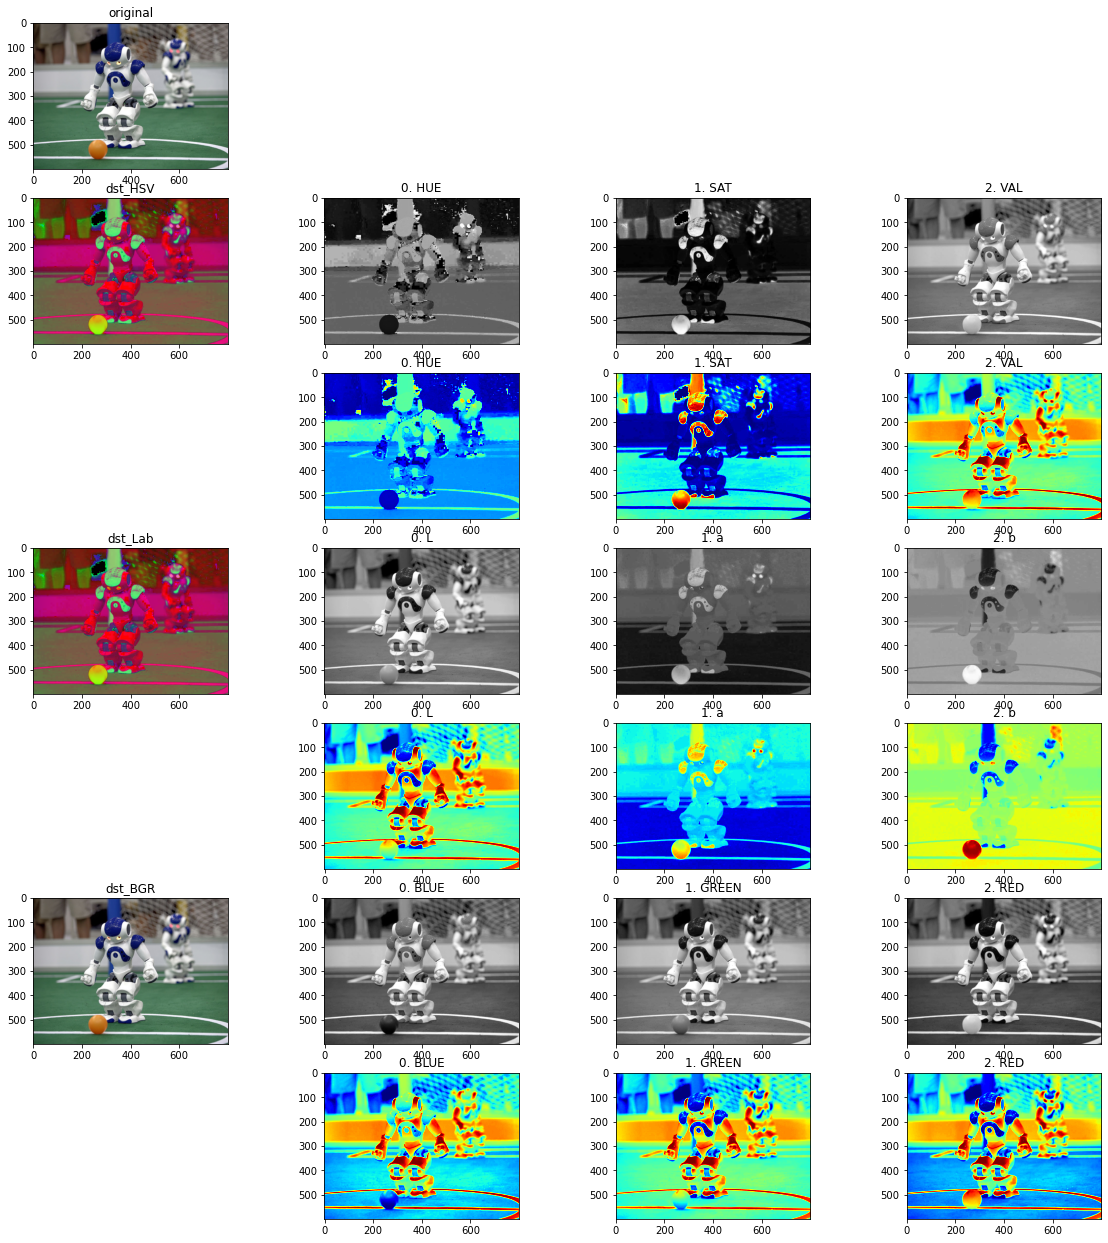

In [2]:
# ex05_01_rgb_hsv_lab
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
%matplotlib inline

src = cv2.imread('football.jpg')
print( src.shape )

dst_HSV = cv2.cvtColor( src, cv2.COLOR_BGR2HSV )
channels_HSV = ['0. HUE','1. SAT','2. VAL']

dst_Lab = cv2.cvtColor( src, cv2.COLOR_BGR2Lab )  # CIE Lab
channels_Lab = ['0. L','1. a','2. b']
     
dst_BGR = src   # RGB   
channels_BGR = ['0. BLUE','1. GREEN','2. RED']

plt.figure(figsize=(20,22))
plt.subplot(7,4,1), plt.imshow( cv2.cvtColor( src, cv2.COLOR_BGR2RGB ) ), plt.title('original')

plt.subplot(7,4,5), plt.imshow( cv2.cvtColor( dst_HSV, cv2.COLOR_BGR2RGB ) ), plt.title('dst_HSV')
plt.subplot(7,4,6), plt.imshow( dst_HSV[...,0], cmap='gray'), plt.title(channels_HSV[0])
plt.subplot(7,4,7), plt.imshow( dst_HSV[...,1], cmap='gray'), plt.title(channels_HSV[1])
plt.subplot(7,4,8), plt.imshow( dst_HSV[...,2], cmap='gray'), plt.title(channels_HSV[2])
plt.subplot(7,4,10), plt.imshow( dst_HSV[...,0], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_HSV[0])
plt.subplot(7,4,11), plt.imshow( dst_HSV[...,1], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_HSV[1])
plt.subplot(7,4,12), plt.imshow( dst_HSV[...,2], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_HSV[2])

plt.subplot(7,4,13), plt.imshow( cv2.cvtColor( dst_HSV, cv2.COLOR_BGR2RGB ) ), plt.title('dst_Lab')
plt.subplot(7,4,14), plt.imshow( dst_Lab[...,0], cmap='gray'), plt.title(channels_Lab[0])
plt.subplot(7,4,15), plt.imshow( dst_Lab[...,1], cmap='gray'), plt.title(channels_Lab[1])
plt.subplot(7,4,16), plt.imshow( dst_Lab[...,2], cmap='gray'), plt.title(channels_Lab[2])
plt.subplot(7,4,18), plt.imshow( dst_Lab[...,0], cmap='jet'), plt.title(channels_Lab[0])
plt.subplot(7,4,19), plt.imshow( dst_Lab[...,1], cmap='jet'), plt.title(channels_Lab[1])
plt.subplot(7,4,20), plt.imshow( dst_Lab[...,2], cmap='jet'), plt.title(channels_Lab[2])

plt.subplot(7,4,21), plt.imshow( cv2.cvtColor( dst_BGR, cv2.COLOR_BGR2RGB ) ), plt.title('dst_BGR')
plt.subplot(7,4,22), plt.imshow( dst_BGR[...,0], cmap='gray'), plt.title(channels_BGR[0])
plt.subplot(7,4,23), plt.imshow( dst_BGR[...,1], cmap='gray'), plt.title(channels_BGR[1])
plt.subplot(7,4,24), plt.imshow( dst_BGR[...,2], cmap='gray'), plt.title(channels_BGR[2])
plt.subplot(7,4,26), plt.imshow( dst_BGR[...,0], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_BGR[0])
plt.subplot(7,4,27), plt.imshow( dst_BGR[...,1], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_BGR[1])
plt.subplot(7,4,28), plt.imshow( dst_BGR[...,2], cmap='jet'), plt.clim(vmin=0,vmax=255), plt.title(channels_BGR[2])



# Ball Video

In [2]:
#load camera and save to img
import cv2

cam = cv2.VideoCapture('ball_tracking_example.mp4')

if cam.isOpened():
    found_cam = True
else:
    found_cam = False

while found_cam:
#     print('found cam')
    retval,frame = cam.read()
    if retval == True:
        cv2.imshow('ccc',frame)
    if cv2.waitKey(10)== 27:
        cv2.destroyAllWindows()
        if cam.isOpened():
            cam.release()
        found_cam = False
    if cv2.waitKey(10)== 113: #q
        print('press Q')
        cv2.imwrite('capture.jpg',frame)
else:
    print('not found cam')

press Q
press Q
press Q
press Q
not found cam


# Video Ball

In [1]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


vdo = cv2.VideoCapture('ball_tracking_example.mp4')  #for vdo-------------
# src_color = cv2.imread('capture.jpg')  #for img-------------
    
win_name = 'football'
cv2.namedWindow(win_name)

#HSV
cv2.createTrackbar("HSV:HUE-low", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:HUE-high", win_name, 0, 179, (lambda a: None) )
cv2.createTrackbar("HSV:SAT-min%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("HSV:HUE-low", win_name, 0)
cv2.setTrackbarPos("HSV:HUE-high", win_name, 0)
cv2.setTrackbarPos("HSV:SAT-min%", win_name, 0)

#LAB
cv2.createTrackbar("Lab:b-low", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:b-high", win_name, 0, 255, (lambda a: None) )
cv2.createTrackbar("Lab:l%", win_name, 0, 100, (lambda a: None) )
cv2.setTrackbarPos("Lab:b-low", win_name, 149)
cv2.setTrackbarPos("Lab:b-high", win_name, 181)
cv2.setTrackbarPos("Lab:l%", win_name, 30)

#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 8)

#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 5)




while True:
    retval,src_color = vdo.read()  #for vdo-------------
    if not retval:    #for vdo-------------
        break       #for vdo-------------
    
#     #HSV
#     src_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )
#     src_h = src_hsv[:,:,0]
#     src_s = src_hsv[:,:,1]
#     src_v = src_hsv[:,:,2]
#     th1 = cv2.getTrackbarPos("HSV:HUE-low", win_name)
#     th2 = cv2.getTrackbarPos("HSV:HUE-high", win_name)
#     min_sat = cv2.getTrackbarPos("HSV:SAT-min%", win_name) / 100.0
#     mask_h = cv2.inRange( src_h, th1, th2 )
#     ret,mask_s = cv2.threshold( src_s,min_sat*255, 255,cv2.THRESH_BINARY )
#     mask_hs = cv2.bitwise_and( mask_h, mask_s )
#     src_segHSV = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_hs, cv2.COLOR_GRAY2BGR ) )

    #LAB
    src_Lab = cv2.cvtColor( src_color, cv2.COLOR_BGR2Lab )
    src_l = src_Lab[:,:,0]
    src_a = src_Lab[:,:,1]
    src_b = src_Lab[:,:,2]
    th1 = cv2.getTrackbarPos("Lab:b-low", win_name)
    th2 = cv2.getTrackbarPos("Lab:b-high", win_name)
    min_sat = cv2.getTrackbarPos("Lab:l%", win_name) / 100.0
    mask_b = cv2.inRange( src_b, th1, th2 )
    ret,mask_l = cv2.threshold( src_l,min_sat*255, 255,cv2.THRESH_BINARY )
    mask_bl = cv2.bitwise_and( mask_b, mask_l )
    src_segLab = cv2.bitwise_and ( src_color,cv2.cvtColor( mask_bl, cv2.COLOR_GRAY2BGR ) )

    #convert to binary img
    src_Grey = cv2.cvtColor( src_segLab, cv2.COLOR_BGR2GRAY )
    seg_greyth = np.zeros_like ( src_Grey )
    seg_greyth [ src_Grey > seg_greyth ] = 255
#     seg_greyth = ~seg_greyth

    #dilate
    ksize = 5
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    src_dilate = cv2.dilate ( seg_greyth, kernel, iterations=itr )
    
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    

    #draw countour circle
    src_contours_circle = src_color.copy()
    src_contours_area = src_color.copy()
    if len(contours) > 0:
        c = max(contours, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)

        if radius > 10:
            cv2.circle(src_contours_area, (int(x), int(y)), int(radius), (0, 255, 0), -1)
            cv2.circle(src_contours_circle, (int(x), int(y)), int(radius), (0, 255, 0), 2)
            

#     #draw countour
#     src_contours_circle = cv2.drawContours ( src_color.copy(), [biggest_contour], -1, (0,255,0), thickness=2 )
#     src_contours_area = cv2.drawContours ( src_color.copy(), [biggest_contour], -1, (0,255,0), thickness=-1 )
    
    #mask
    condition = (src_contours_area[...,1]==255) & (src_contours_area[...,0]==0) & (src_contours_area[...,2]==0)
    final = np.zeros_like(src_color)
    final[condition] = src_color[condition]
    
    
            
    
#     max_len = 0
#     for c in contours:
#         if len(c) > max_len:
#             src_contours_Large = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=2 )
#             src_contours_Large2 = cv2.drawContours ( src_color.copy(), [c], -1, (0,255,0), thickness=-1 )
#             max_len = len(c)
    
    
    pig = [ 
#             cv2.cvtColor( src_color, cv2.COLOR_BGR2RGB ),
            src_color,
# #             #HSV
# #             cv2.cvtColor( src_h, cv2.COLOR_GRAY2RGB ),
# #             cv2.cvtColor( src_s, cv2.COLOR_GRAY2RGB ),
# #             cv2.cvtColor( src_v, cv2.COLOR_GRAY2RGB ),
# #             cv2.applyColorMap(src_h, 2),
# #             cv2.cvtColor( src_segHSV, cv2.COLOR_BGR2RGB ),
#             #Lab
#             cv2.cvtColor( src_b, cv2.COLOR_GRAY2RGB ),
#             cv2.applyColorMap(src_b, 4),
#             cv2.cvtColor( src_segLab, cv2.COLOR_BGR2RGB ),
        
#             cv2.cvtColor( seg_greyth, cv2.COLOR_GRAY2RGB ),
        
#             #dilate
#             cv2.cvtColor( src_dilate, cv2.COLOR_GRAY2RGB ),
#             #erode
            cv2.cvtColor( src_erode, cv2.COLOR_GRAY2BGR ),
        
#             #contour
            src_contours_circle,
#             cv2.cvtColor( src_contours_circle, cv2.COLOR_BGR2RGB ),
#             cv2.cvtColor( src_contours_area, cv2.COLOR_BGR2RGB ),
        
            
            
        
            #final
            cv2.cvtColor( final, cv2.COLOR_BGR2RGB ),
            
            # COLORMAP_AUTUMN = 0
            # COLORMAP_BONE = 1
            # COLORMAP_COOL = 8
            # COLORMAP_HOT = 11
            # COLORMAP_HSV = 9
            # COLORMAP_JET = 2
            # COLORMAP_OCEAN = 5
            # COLORMAP_PINK = 10
            # COLORMAP_RAINBOW = 4
            # COLORMAP_SPRING = 7
            # COLORMAP_SUMMER = 6
            # COLORMAP_WINTER = 3
#           cv2.applyColorMap(imgColor, 3)
        

            
          ]

#     #For test---slow
#     for i in range(15):
#         if i < len(pig):
#             pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
#         else:
#             pig.append(np.zeros_like(pig[0]))
#     frame_h = (np.hstack((pig[0],pig[1],pig[2])),
#              np.hstack((pig[3],pig[4],pig[5])),
#              np.hstack((pig[6],pig[7],pig[8])),
#              np.hstack((pig[9],pig[10],pig[11])),
#              np.hstack((pig[12],pig[13],pig[14])),
               
#             )    

    #ok
    frame_h = (np.hstack((pig[0],pig[1])),
             np.hstack((pig[2],pig[3])),
            )   
     
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.2, fy=0.2)
    cv2.imshow(win_name+'2', frame)


    

    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

# highway

In [3]:
#load camera and save to img
import cv2

src = 'highway.mp4'
vdo = cv2.VideoCapture(src)

if vdo.isOpened():
    found_vdo = True
else:
    found_vdo = False

while found_vdo:
    retval,frame = vdo.read()
    if retval == True:
        cv2.imshow('ccc',frame)
    if cv2.waitKey(10)== 27:
        cv2.destroyAllWindows()
        if vdo.isOpened():
            vdo.release()
        found_vdo = False
    if cv2.waitKey(10)== 113: #q
        print('press Q')
        cv2.imwrite(src.split('.')[0]+'.jpg',frame)
else:
    print('not found vdo')

press Q
press Q
not found vdo


In [10]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


# vdo = cv2.VideoCapture('highway.mp4')  #for vdo-------------
src = cv2.imread('highway.jpg')  #for img-------------
    
win_name = 'window'
cv2.namedWindow(win_name)
#grey threshoding
cv2.createTrackbar("greyth:thres", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:thres", win_name, 33)
cv2.createTrackbar("greyth:maxval", win_name, 0, 255, (lambda a: None) )
cv2.setTrackbarPos("greyth:maxval", win_name, 255)

#erode&dilate
#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 2)
#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 3)







while True:
#     retval,src = vdo.read()  #for vdo-------------
#     if not retval:    #for vdo-------------
#         break       #for vdo-------------
    
    src_color = src[340:720,500:800]
    
    src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2GRAY)
    
    
    
    #smoothing filter
    ksize = 3
    dst_gauss = cv2.GaussianBlur( src_grey,(ksize,ksize),0 ) # Weighted average (Gaussian) smoothing filter
    dst_gauss = cv2.GaussianBlur( dst_gauss,(ksize,ksize),0 ) # Weighted average (Gaussian) smoothing filter
    dst_gauss = cv2.GaussianBlur( dst_gauss,(ksize,ksize),0 ) # Weighted average (Gaussian) smoothing filter
    
    src_adapt = cv2.adaptiveThreshold(dst_gauss,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    
    
    kernel = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [1, 0, 0]], dtype=np.uint8)
    opening = cv2.morphologyEx(src_adapt, cv2.MORPH_OPEN, kernel, iterations=10)
    
    contours,hier = cv2.findContours( opening,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    
    #draw countour
    src_contours_circle = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=2 )
    src_contours_area = cv2.drawContours ( src_color.copy(), contours, -1, (0,255,0), thickness=-1 )

    
#     #grey_thresholding
#     thres = cv2.getTrackbarPos("greyth:thres", win_name)
#     maxval = cv2.getTrackbarPos("greyth:maxval", win_name)
#     ret1,src_greyth = cv2.threshold(opening,thres,maxval,cv2.THRESH_BINARY) 
#     src_greyth = ~src_greyth
    
    
    
    
    
#     #convert to binary img
#     #src_Grey = cv2.cvtColor( src_greyth, cv2.COLOR_BGR2GRAY )
#     src_Grey = src_greyth
#     seg_greyth = np.zeros_like ( src_Grey )
#     seg_greyth [ src_Grey > seg_greyth ] = 255
#     #seg_greyth = ~seg_greyth
    
#     #erode&dilate--------
#     ksize = 5
#     kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
#     #erode
#     itr2 = cv2.getTrackbarPos("erode:itr", win_name)
#     src_erode = cv2.erode ( seg_greyth, kernel, iterations=itr2 )
#     #dilate
#     itr = cv2.getTrackbarPos("dilate:itr", win_name)
#     src_dilate = cv2.dilate ( src_erode, kernel, iterations=itr )
    
    
#     #contour
#     contours,hier = cv2.findContours( src_dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    
#     cnt_filtered = []
#     print('--------')
#     for cnt in contours:
#         # Calculate area and remove small elements
#         area = cv2.contourArea(cnt)
#         print('area',area)
        
#         if area > 400:
#             cnt_filtered.append(cnt)

    #draw countour
    src_contours_circle = cv2.drawContours ( src_color.copy(), cnt_filtered, -1, (0,255,0), thickness=2 )
    src_contours_area = cv2.drawContours ( src_color.copy(), cnt_filtered, -1, (0,255,0), thickness=-1 )

    
    
    
    

    
    
    pig = [ 
            src_color,
            src_grey,
            opening,
            src_greyth,
            src_adapt,
#             dst_gauss,
            src_greyth,
#             src_erode,
            src_contours_circle,
            src_contours_area


            
          ]

    #For test---slow
    for i in range(15):
        if i < len(pig):
            pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
        else:
            pig.append(np.zeros_like(pig[0]))
    frame_h = (np.hstack((pig[0],pig[1],pig[2])),
             np.hstack((pig[3],pig[4],pig[5])),
             np.hstack((pig[6],pig[7],pig[8])),
             np.hstack((pig[9],pig[10],pig[11])),
             np.hstack((pig[12],pig[13],pig[14])),
               
            )    

#     #ok
#     frame_h = (np.hstack((pig[0],pig[1])),
#              np.hstack((pig[2],pig[3])),
#             )   
     
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
    cv2.imshow(win_name+'2', frame)
    if cv2.waitKey(1) == 27: # press ESC to exit
            break

cv2.destroyAllWindows() 
# #for vdo----------------
# if vdo.isOpened():
#     vdo.release()
#     found_cam = False

In [15]:
#detect line
import cv2
import numpy as np

# img = cv2.imread('sudoku.jpg')
img = cv2.imread('highway.jpg')[340:720,500:800]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
#start form
import numpy as np
from matplotlib import pyplot as plt
import cv2


vdo = cv2.VideoCapture('highway.mp4')  #for vdo-------------
# src = cv2.imread('highway.jpg')  #for img-------------
    
win_name = 'window'
cv2.namedWindow(win_name)

cv2.createTrackbar("gray-inrange1:", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("gray-inrange1:", win_name, 0)
cv2.createTrackbar("gray-inrange2:", win_name, 0, 255, (lambda a: None))
cv2.setTrackbarPos("gray-inrange2:", win_name, 17)

#erode&dilate
#erode
cv2.createTrackbar("erode:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("erode:itr", win_name, 3)
#dilate
cv2.createTrackbar("dilate:itr", win_name, 0, 20, (lambda a: None))
cv2.setTrackbarPos("dilate:itr", win_name, 3)

#filterCntArea
cv2.createTrackbar("filterCntArea1:", win_name, 0, 1000, (lambda a: None))
cv2.setTrackbarPos("filterCntArea1:", win_name,245)
cv2.createTrackbar("filterCntArea2:", win_name, 0, 100000, (lambda a: None))
cv2.setTrackbarPos("filterCntArea2:", win_name,3876)




while True:
    retval,src = vdo.read()  #for vdo-------------
    if not retval:    #for vdo-------------
        break       #for vdo-------------
    
    src_color = src
    
    src_gray = cv2.cvtColor(src_color,cv2.COLOR_BGR2GRAY)
    
    th1 = cv2.getTrackbarPos("gray-inrange1:", win_name)
    th2 = cv2.getTrackbarPos("gray-inrange2:", win_name)
    gray_filtered = cv2.inRange(src_gray, th1, th2)
    
    #erode&dilate--------
    ksize = 5
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
    #dilate
    itr = cv2.getTrackbarPos("dilate:itr", win_name)
    src_dilate = cv2.dilate ( gray_filtered, kernel, iterations=itr )
    #erode
    itr2 = cv2.getTrackbarPos("erode:itr", win_name)
    src_erode = cv2.erode ( src_dilate, kernel, iterations=itr2 )
    
    
    
    #contour
    contours,hier = cv2.findContours( src_erode,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
    
    #filter contour Area
    th1 = cv2.getTrackbarPos("filterCntArea1:", win_name)
    th2 = cv2.getTrackbarPos("filterCntArea2:", win_name)
    contours_filtered = []
    print('--------')
    for cnt in contours:
        # Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        print('area',area)

        if area > th1 and area < th2:
            contours_filtered.append(cnt)


    #draw countour
    src_contours_circle = cv2.drawContours ( src_color.copy(), contours_filtered, -1, (0,255,0), thickness=2 )
    src_contours_area = cv2.drawContours ( src_color.copy(), contours_filtered, -1, (0,255,0), thickness=-1 )
    
    #draw rectangle
    for c in contours_filtered:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(src_contours_area,(x,y),(x+w,y+h),(255,0,0),2)
        
    #draw fit rectangle
    for c in contours_filtered:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(src_contours_area,[box],0,(0,0,255),2)
        print('box',box)

    

    
    
    pig = [ 
#             src_color,
            src_gray,
            gray_filtered,
            src_contours_circle,
            src_contours_area

          ]
    
    #convert eachpic to 3 ch
    pig_ = []
    for p in pig:
        if len(p.shape) == 2:
            p = cv2.cvtColor(p,cv2.COLOR_GRAY2BGR)
        pig_.append(p)
    pig = pig_
    
#     #For test---slow
#     for i in range(15):
#         if i < len(pig):
#             pig[i] = cv2.cvtColor(pig[i],cv2.COLOR_RGB2BGR)
#         else:
#             pig.append(np.zeros_like(pig[0]))
#     frame_h = (np.hstack((pig[0],pig[1],pig[2])),
#              np.hstack((pig[3],pig[4],pig[5])),
#              np.hstack((pig[6],pig[7],pig[8])),
#              np.hstack((pig[9],pig[10],pig[11])),
#              np.hstack((pig[12],pig[13],pig[14])),
               
#             )    

    #ok
    frame_h = (np.hstack((pig[0],pig[1])),
             np.hstack((pig[2],pig[3])),
            )   
     
    frame = np.vstack(frame_h)
    frame = cv2.resize(frame, (0,0), fx=0.3, fy=0.3)
    cv2.imshow(win_name+'2', frame)
    if cv2.waitKey(1) == 27: # press ESC to exit
        break

cv2.destroyAllWindows() 
#for vdo----------------
if vdo.isOpened():
    vdo.release()
    found_cam = False

# gray = cv2.imread(filename, cv2.CV_LOAD_IMAGE_GRAYSCALE)
# gray_filtered = cv2.inRange(gray, 190, 255)






--------
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 251.0
area 0.0
area 0.0
area 170.0
area 0.0
area 80.5
area 0.0
area 0.0
area 0.0
area 9.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 253.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 17.0
area 0.0
area 0.0
area 0.0
area 0.0
area 1.5
area 4749.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 9.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 752.0
area 0.0
area 0.0
area 0.0
area 1.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 13.0
area 0.0
area 0.0
area 0.0
area 19.0
area 0.0
area 0.0
area 53.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 5265.0
area 0.0
area 0.0
area 0.0
area 0.0
area 157.0
area 23

area 0.0
area 0.0
area 3.0
area 0.0
area 0.0
area 17.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 14.0
area 0.0
area 2.0
area 0.0
area 0.0
area 0.0
area 36.0
area 0.0
area 0.0
area 0.0
area 0.0
area 14.5
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 1.0
area 71.0
area 0.0
area 0.0
area 0.0
area 64.0
area 0.0
area 0.0
area 0.0
area 0.5
area 7.0
area 0.0
area 11.0
area 0.0
area 0.0
area 2.0
area 93.5
area 21.5
area 263.5
area 0.0
area 30.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 8.5
area 0.0
area 3322.5
area 0.0
area 0.0
area 38.0
area 0.0
area 0.5
area 0.0
area 0.0
area 7.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 150.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 20.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 21.5
area 0.0
area 0.0
area 2.0
area 0.0
area 16.0
area 0.0
area 0.0
area 0.0
area 0.0
area 1.5
area 0.0
area 0.0
area 123.0
area 0.0
area 0.0
area 0.0
area 0.0
area 

area 0.0
area 0.0
area 0.0
area 0.0
area 23.5
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 128.5
area 76.5
area 7.5
area 0.0
area 0.0
area 0.0
area 11.5
area 19.0
area 20.0
area 105.5
area 0.0
area 117.5
area 0.0
area 0.0
area 1.5
area 0.0
area 0.0
area 0.0
area 1.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.5
area 107.0
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 496.5
area 9919.0
area 0.0
area 0.0
area 0.0
area 0.5
area 54.5
area 0.0
area 0.0
area 0.0
area 9.5
area 0.0
area 0.0
area 28.5
area 0.0
area 4.5
area 0.0
area 0.0
area 0.0
area 0.0
area 4.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 16.5
area 23.0
area 0.0
area 0.0
area 1.5
area 0.0
area 1.5
area 0.0
area 0.0
area 0.0
area 7.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 306.0
area 0.0
area 0.0
area 1089.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 30.0
area 45.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0

area 4.0
area 0.0
area 0.0
area 0.0
area 0.0
area 80.5
area 0.0
area 0.0
area 200.5
area 24.0
area 70.5
area 0.0
area 0.0
area 0.0
area 0.0
area 9840.0
area 0.0
area 110.5
area 8.5
area 0.0
area 1.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 375.0
area 779.5
area 0.0
area 0.0
area 39.0
area 0.0
area 20.0
area 0.0
area 14.0
area 11.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 495.0
area 0.0
area 0.0
area 0.0
area 0.0
area 14.5
area 0.0
area 0.0
area 0.0
area 1.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 1081.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 36.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 110.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 29.5
area 0.5
area 0.5
area 0.0
area 1.0
area 0.0
area 73016.5
area 0.0
area 230.0
area 62.0
area 66.0
box [[409 528]
 [440 519]
 [453 563]


area 4.0
area 82.5
area 211.5
area 0.0
area 0.0
area 3.5
area 311.5
area 25.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 719.5
area 0.0
area 0.5
area 0.0
area 5.0
area 109.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 11327.0
area 0.0
area 267.0
area 1.0
area 0.0
area 0.0
area 36.5
area 11.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 5.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 15.5
area 8.0
area 0.0
area 0.0
area 0.0
area 2.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 1071.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 7.0
area 0.0
area 0.0
area 0.0
area 52.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 394.5
area 0.0
area 74243.5
area 0.0
area 253.0
area 0.0
area 60.0
area 0.0
area 66.0
box [[845 630

area 17.0
area 0.0
area 0.0
area 4.0
area 750.0
area 78.5
area 271.5
area 0.0
area 0.0
area 0.0
area 10.0
area 26.5
area 463.5
area 274.5
area 0.0
area 131.0
area 0.0
area 0.0
area 0.0
area 0.0
area 8769.0
area 0.0
area 0.0
area 0.0
area 5.0
area 122.5
area 0.0
area 0.0
area 27.0
area 0.0
area 0.0
area 0.0
area 9.0
area 0.0
area 0.0
area 520.0
area 0.0
area 255.5
area 0.0
area 10.5
area 0.0
area 0.0
area 12.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 16.0
area 0.0
area 0.0
area 144.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 1023.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 192.5
area 69.5
area 0.0
area 0.0
area 0.0
area 0.0
area 3.0
ar

box [[824 534]
 [832 533]
 [851 620]
 [843 622]]
box [[ -7 508]
 [ 94 430]
 [102 440]
 [  0 518]]
box [[ -6 360]
 [ 15 332]
 [ 55 364]
 [ 33 392]]
--------
area 0.0
area 7.0
area 3.5
area 0.0
area 0.0
area 0.0
area 17.0
area 1.5
area 0.0
area 0.0
area 0.0
area 112.5
area 0.0
area 18.5
area 0.0
area 0.0
area 31.5
area 0.0
area 32.0
area 0.0
area 467.5
area 28.5
area 366.0
area 92.5
area 0.0
area 0.0
area 0.0
area 144.0
area 17.5
area 0.0
area 2.0
area 0.0
area 0.0
area 28.5
area 0.0
area 0.0
area 7910.5
area 0.0
area 0.5
area 0.0
area 1.5
area 0.0
area 105.0
area 0.0
area 0.0
area 27.0
area 0.0
area 146.0
area 0.0
area 227.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 67.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 40.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 2.0
area 0.0
area 0.0
area 0.0
area 0.5
area 0.0
area 0.0
area 0.0
area 0.0
area 16.5
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 0.0
area 

In [44]:
import numpy as np
pic = [1,2,3,4,5,6,7,8,9,10,11]
w = 5
h = -(-len(pic) // w) #round up


z = []
for i in range(h):
    a = np.hstack(tuple(pic[w*i:w*i+w]))
    if len
    z.append(
    a = np.hstack(tuple(pic[w*i:w*i+w]))
    if len)
tuple(z)

# 0:5
# 5:10

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]), array([11]))

In [16]:
np.hstack(tuple([1,2]))

NameError: name 'np' is not defined

In [38]:
isinstance(1, int)

True

In [42]:
11%5


1